In [1]:
!pip install openpyxl


In [2]:
from google.colab import files
uploaded = files.upload()


Saving IPL sample data.xlsx to IPL sample data.xlsx


In [5]:
import pandas as pd

df_raw = pd.read_excel("/content/IPL sample data.xlsx", sheet_name=0, header=None)
df_raw.head(20)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping,NaN,NaN
1,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout,NaN,NaN
2,Runs,"""+"" stands for runs saved ""-"" stands for runs ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
5,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium
6,NaN,IPL2367,1,Delhi Capitals,Phil Salt,0.2,wicket keeper,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
7,NaN,IPL2367,1,Delhi Capitals,Yash Dhull,0.3,covers,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
8,NaN,IPL2367,1,Delhi Capitals,Axer Patel,0.4,point,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
9,NaN,IPL2367,1,Delhi Capitals,NaN,0.5,NaN,NaN,NaN,NaN,1,Delhi,Arun Jaitly Stadium


In [6]:
import pandas as pd


df = pd.read_excel("IPL sample data.xlsx", header=4)

# Drop rows where 'Player Name' is empty (e.g., blank entries)
df = df.dropna(subset=["Player Name"])

# Optional: Convert Runs column to numeric (replace NaNs with 0)
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce').fillna(0)


df.head()


,Unnamed: 0,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
0,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1.0,1,Delhi,Arun Jaitly Stadium
1,NaN,IPL2367,1,Delhi Capitals,Phil Salt,0.2,wicket keeper,Y,Y,0.0,1,Delhi,Arun Jaitly Stadium
2,NaN,IPL2367,1,Delhi Capitals,Yash Dhull,0.3,covers,Y,Y,0.0,1,Delhi,Arun Jaitly Stadium
3,NaN,IPL2367,1,Delhi Capitals,Axer Patel,0.4,point,Y,Y,0.0,1,Delhi,Arun Jaitly Stadium
5,NaN,IPL2367,1,Delhi Capitals,Lalit yadav,0.6,cover point,Y,Y,0.0,1,Delhi,Arun Jaitly Stadium


In [7]:
# Check column names
print(df.columns.tolist())


['Unnamed: 0', 'Match No.', 'Innings', 'Teams', 'Player Name', 'BallCount', 'Position', 'Pick', 'Throw', 'Runs', 'Overcount', 'Venue', 'Stadium']


In [8]:
# Drop the unnecessary index column
df = df.drop(columns=['Unnamed: 0'])


df.columns.tolist()


['Match No.',
 'Innings',
 'Teams',
 'Player Name',
 'BallCount',
 'Position',
 'Pick',
 'Throw',
 'Runs',
 'Overcount',
 'Venue',
 'Stadium']

In [9]:
# Set weights
weights = {
    'CP': 1,   # Clean Pick
    'GT': 1,   # Good Throw
    'C': 3,    # Catches
    'DC': -3,  # Dropped Catches
    'ST': 3,   # Stumpings
    'RO': 3,   # Run Outs
    'MRO': -2, # Missed Run Outs
    'DH': 2    # Direct Hits
}

# Manually create the performance matrix table from the image
data = {
    'Player Name': [
        'Rilee russouw', 'Phil Salt', 'Yash Dhull',
        'Axer Patel', 'Lalit yadav', 'Aman Khan', 'Kuldeep yadav'
    ],
    'CP': [2, 1, 3, 2, 1, 4, 3],
    'GT': [1, 2, 1, 3, 2, 1, 0],
    'C': [1, 0, 2, 1, 1, 0, 1],
    'DC': [0, 1, 0, 0, 0, 0, 1],
    'ST': [0, 0, 0, 1, 0, 0, 0],
    'RO': [0, 1, 0, 0, 0, 1, 0],
    'MRO': [0, 0, 1, 0, 0, 0, 0],
    'DH': [1, 0, 0, 0, 1, 0, 1],
    'RS': [2, -1, 3, 0, -2, 1, 4]
}

df_score = pd.DataFrame(data)

# Calculate PS
df_score['PS'] = (
    df_score['CP'] * weights['CP'] +
    df_score['GT'] * weights['GT'] +
    df_score['C'] * weights['C'] +
    df_score['DC'] * weights['DC'] +
    df_score['ST'] * weights['ST'] +
    df_score['RO'] * weights['RO'] +
    df_score['MRO'] * weights['MRO'] +
    df_score['DH'] * weights['DH'] +
    df_score['RS']
)

df_score


,Player Name,CP,GT,C,DC,ST,RO,MRO,DH,RS,PS
0,Rilee russouw,2,1,1,0,0,0,0,1,2,10
1,Phil Salt,1,2,0,1,0,1,0,0,-1,2
2,Yash Dhull,3,1,2,0,0,0,1,0,3,11
3,Axer Patel,2,3,1,0,1,0,0,0,0,11
4,Lalit yadav,1,2,1,0,0,0,0,1,-2,6
5,Aman Khan,4,1,0,0,0,1,0,0,1,9
6,Kuldeep yadav,3,0,1,1,0,0,0,1,4,9


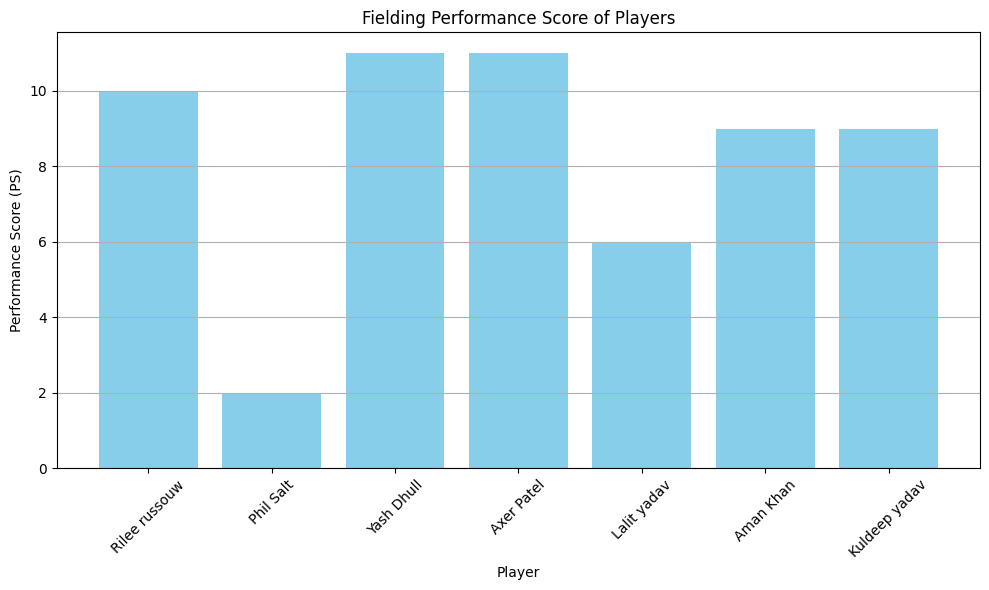

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_score['Player Name'], df_score['PS'], color='skyblue')
plt.title('Fielding Performance Score of Players')
plt.xlabel('Player')
plt.ylabel('Performance Score (PS)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [13]:
df_score.to_excel("Final_Fielding_Scores.xlsx", index=False)
files.download("Final_Fielding_Scores.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import pandas as pd

df = pd.read_excel('/content/Final_Fielding_Scores.xlsx')


top_ps = df.sort_values(by='PS', ascending=False)[['Player Name', 'PS']].head(3)
print("Top 3 Players by Performance Score:\n", top_ps.to_string(index=False), "\n")


best_catcher = df.sort_values(by='C', ascending=False)[['Player Name', 'C']].head(1)
print("Best Catcher:\n", best_catcher.to_string(index=False), "\n")


df['Total Run Outs'] = df['RO'] + df['DH']
best_ro = df.sort_values(by='Total Run Outs', ascending=False)[['Player Name', 'Total Run Outs']].head(1)
print("Most Run Outs (RO + DH):\n", best_ro.to_string(index=False), "\n")


best_thrower = df.sort_values(by='GT', ascending=False)[['Player Name', 'GT']].head(1)
print("Best Thrower (Good Throws):\n", best_thrower.to_string(index=False), "\n")


action_columns = ['CP', 'GT', 'C', 'DC', 'ST', 'RO', 'MRO', 'DH']
df['Total Involvement'] = df[action_columns].sum(axis=1)
most_involved = df.sort_values(by='Total Involvement', ascending=False)[['Player Name', 'Total Involvement']].head(1)
print("Most Involved Fielder:\n", most_involved.to_string(index=False))


Top 3 Players by Performance Score:
   Player Name  PS
   Yash Dhull  11
   Axer Patel  11
Rilee russouw  10 

Best Catcher:
 Player Name  C
 Yash Dhull  2 

Most Run Outs (RO + DH):
   Player Name  Total Run Outs
Rilee russouw               1 

Best Thrower (Good Throws):
 Player Name  GT
 Axer Patel   3 

Most Involved Fielder:
 Player Name  Total Involvement
 Yash Dhull                  7


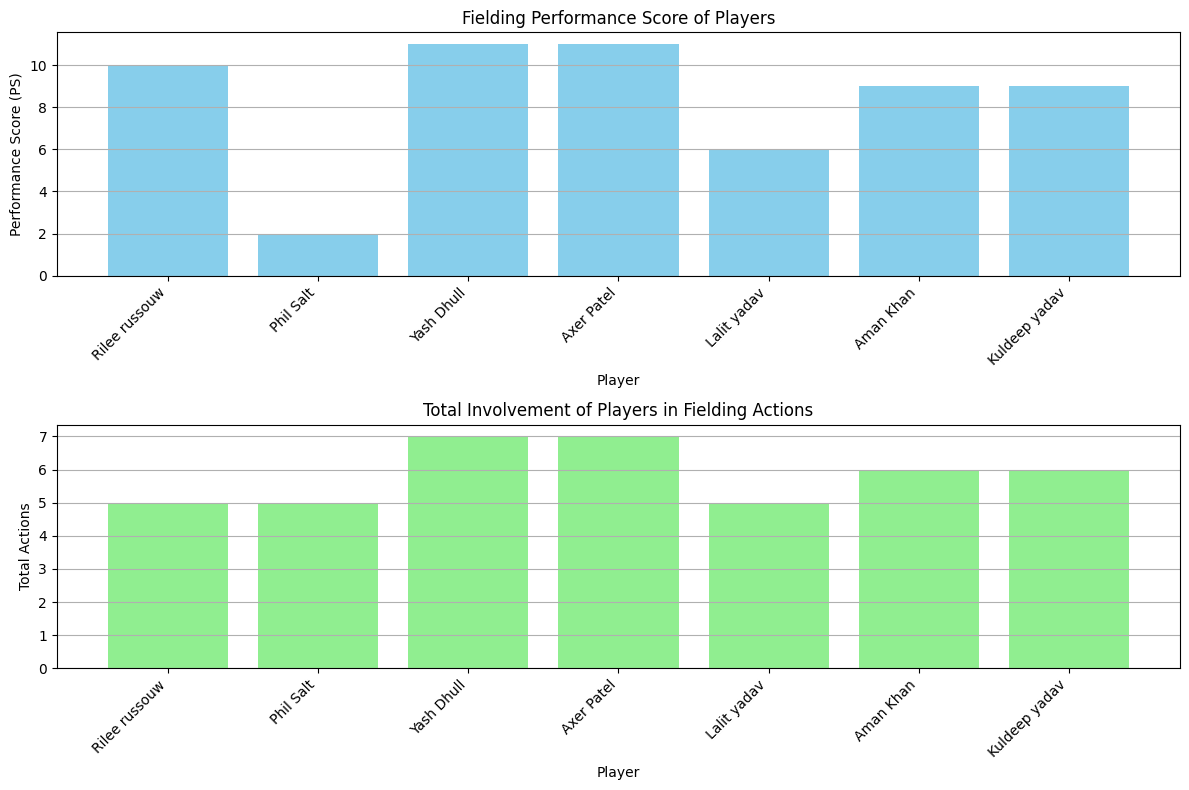

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotting Performance Score (PS)
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.bar(df['Player Name'], df['PS'], color='skyblue')
plt.title('Fielding Performance Score of Players')
plt.xlabel('Player')
plt.ylabel('Performance Score (PS)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Plotting Total Involvement
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
plt.bar(df['Player Name'], df['Total Involvement'], color='lightgreen')
plt.title('Total Involvement of Players in Fielding Actions')
plt.xlabel('Player')
plt.ylabel('Total Actions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()